Small Applications Development with Python\
Robert Palmere, 2021\
Email: rdp135@chem.rutgers.edu

The objective is to write a small program for linear regression with a graphical user interface (GUI).

We will use Tkinter library for developing our small application.

First, we will generate a template of the class we wish to generate with annotations to indicate their purpose. This serves as an outline for how our application will work.

In [ ]:
class Application(object):
    
    def __init__(self):
        pass
    
    def __str__(self):
        '''Returns a report for print()'''
        pass
    
    @staticmethod
    def register():
        '''Functional decorator to capture which analysis function was most recently called'''
        pass
    
    @property
    def all_ok():
        '''Check if all instance attributes are set properly'''
        pass
    
    def load(self):
        '''Load the data from a given .dat or .txt file'''
        pass
    
    def select(self):
        '''Select the x / y columns for analysis'''
        pass
    
    def report(self):
        '''Generate a report for the most recently performed analysis'''
        pass
    
    def save(self):
        '''Save a report for the most recently performed analysis'''
        pass
    
    def linear_regression(self):
        '''Perform linear regression on the loaded data set'''
        pass
    
    def multi_linear_regression(self):
        '''Perform linear regression on all of the data set'''
        pass
    
    def plot(self):
        '''Plot the data from the most recently performed analysis'''
        pass

Now we will begin to write the functions separately for manual testing before implementing them in the class.

In [1]:
import numpy as np

def load(f):
    data_ = []
    try:
        if f[-4:] == '.txt' or f[-4:] == '.dat':
            with open(f) as fp:
                lines = fp.readlines()
                for line in lines:
                    line = [float(i) for i in line.strip() if ' ' not in i]
                    data_.append(line)
    except:
        raise ValueError('Loaded file must have a .txt or .dat file extension.')
        
    return np.asarray(data_)

test_data = load('test.txt')
print(test_data)

[[1. 2. 3. 4.]
 [3. 9. 8. 4.]
 [4. 3. 8. 4.]
 [6. 3. 7. 7.]
 [7. 9. 1. 9.]
 [8. 8. 9. 3.]
 [9. 3. 4. 2.]]


In [2]:
def select(data):
    
    print('--Available Data--\n')
    print(data)
    print('\n')
    
    selected = []
    for option in ('x', 'y'):
        idx = input(f'Select the {option} column: ')
        idx = int(idx)
        if not isinstance(idx, int):
            raise ValueError(f'{option} selection must be an integer.')
        selected.append(data[:, idx])
        
    return selected[0], selected[1]

x, y = select(test_data)
print(x, y)

--Available Data--

[[1. 2. 3. 4.]
 [3. 9. 8. 4.]
 [4. 3. 8. 4.]
 [6. 3. 7. 7.]
 [7. 9. 1. 9.]
 [8. 8. 9. 3.]
 [9. 3. 4. 2.]]




Select the x column:  0
Select the y column:  1


[1. 3. 4. 6. 7. 8. 9.] [2. 9. 3. 3. 9. 8. 3.]


In [3]:
from scipy.stats import linregress

def linear_regression(x, y):
    result = linregress(x, y)
    y_ = result.intercept + result.slope*x
    return y_

ry = linear_regression(x, y)
print(ry)

[4.20402299 4.69252874 4.93678161 5.42528736 5.66954023 5.9137931
 6.15804598]


In [4]:
def multi_linear_regression(x, data):
    rys_ = []
    ys_ = []
    for col_idx in range(data.shape[1]):
        if not np.array_equal(x, data[:, col_idx]): # Get every other column aside from selected x column
            result = linregress(x, data[:, col_idx])
            calculated_y = result.intercept + result.slope*x
            rys_.append(calculated_y)
            ys_.append(data[:, col_idx])
    return np.asarray(ys_), rys_

ys, rys = multi_linear_regression(x, test_data)

print(rys)

[array([4.20402299, 4.69252874, 4.93678161, 5.42528736, 5.66954023,
       5.9137931 , 6.15804598]), array([5.81609195, 5.77011494, 5.74712644, 5.70114943, 5.67816092,
       5.65517241, 5.63218391]), array([4.72701149, 4.72126437, 4.7183908 , 4.71264368, 4.70977011,
       4.70689655, 4.70402299])]


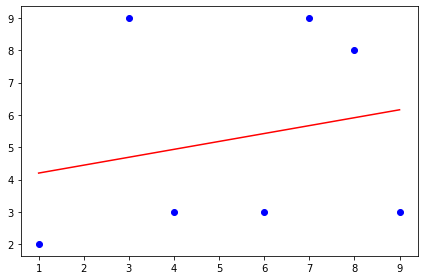

In [5]:
import matplotlib.pyplot as plt

def plot(x, y, ry):
    if len(y.shape) > 1:
        fig, ax = plt.subplots(len(y), 1)
        for n, i in enumerate(y):
            ax[n].scatter(x, i, color='b')
            ax[n].plot(x, ry[n], 'r')
        plt.tight_layout()
    else:
        fig, ax = plt.subplots()
        ax.scatter(x, y, color='b')
        ax.plot(x, ry, 'r')
        plt.tight_layout()
        
plot(x, y, ry)

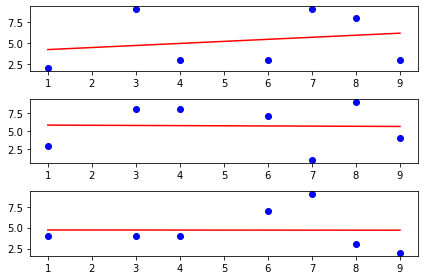

In [6]:
plot(x, ys, rys)

Now that we have written most of the functions for our class. Let's place them within the class.

In [7]:
from functools import wraps
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

class Application(object):
    
    def __init__(self):
        self.data = None
        self.registered = None
        self.x, self.y = (None, None)
        self.selected = False
        self.ry = None
        self.rvalue = None
    
    def __str__(self):
        '''Returns a report for print()'''
        if self.all_ok:
            return self.report()
    
    def register(func):
        '''Functional decorator to capture which analysis function was most recently called'''
        @wraps(func)
        def wrapped(inst, *args, **kwargs):
            inst.registered = func.__name__
            return func(inst, *args, **kwargs)
        return wrapped
    
    @property
    def all_ok(self):
        '''Check if instance attributes are set properly before permitting analysis'''
        conditions = np.asarray([self.data.all(), self.selected == True, self.registered != None])
        return conditions.all()
    
    @register
    def load(self, f):
        '''Load the data from a given .dat or .txt file'''
        data_ = []
        try:
            if f[-4:] == '.txt' or f[-4:] == '.dat':
                with open(f) as fp:
                    lines = fp.readlines()
                    for line in lines:
                        line = [float(i) for i in line.strip() if ' ' not in i]
                        data_.append(line)
        except:
            raise ValueError('Loaded file must have a .txt or .dat file extension.')
        self.data = np.asarray(data_)
        return self.data
    
    def select(self):
        '''Select the x / y columns for analysis'''
        print('--Available Data--\n')
        print(self.data)
        print('\n')

        selected = []
        for option in ('x', 'y'):
            idx = input(f'Select the {option} column: ')
            idx = int(idx)
            if not isinstance(idx, int):
                raise ValueError(f'{option} selection must be an integer.')
            selected.append(self.data[:, idx])
        self.x = selected[0]
        self.y = selected[1]
        self.selected = True
    
    def report(self):
        '''Generate a report for the most recently performed analysis'''
        if self.all_ok:
            report_ = ''
            if self.registered == 'linear_regression':
                report_ += 'R-squared Values:\n'
                report_ += f'$R^2$ = {self.rsquared}\n'
                report_ += 'Regression X Ys:\n'
                report_ += f'{self.x} {self.ry}\n'
            elif self.registered == 'multi_linear_regression':
                report_ += 'R-squared Values:\n'
                for i in range(len(self.ry)):
                    report_ += f'$R^2$ = {self.rsquared[i]}\n'
                report_ += 'Regression X Ys:\n'
                for i in range(len(self.ry)):
                    report_ += f'{self.x} {self.ry}\n'
            else:
                raise ValueError('No analysis performed yet.')
                
            return report_
        else:
            raise ValueError('Not ready to report.')
            
    
    def save(self):
        '''Save a report for the most recently performed analysis'''
        with open('saved.txt', 'w') as fp:
            fp.write(self.report())
    
    @register
    def linear_regression(self):
        '''Perform linear regression on the loaded data set'''
        if self.all_ok:
            result = linregress(self.x, self.y)
            y_ = result.intercept + result.slope*self.x
            self.ry = y_
            self.rsquared = result.rvalue
        else:
            raise ValueError('Not ready to perform analysis.')
    
    @register
    def multi_linear_regression(self):
        '''Perform linear regression on all of the data set'''
        rys_ = []
        ys_ = []
        rsquareds = []
        for col_idx in range(self.data.shape[1]):
            if not np.array_equal(self.x, self.data[:, col_idx]): # Get every other column aside from selected x column
                result = linregress(self.x, self.data[:, col_idx])
                calculated_y = result.intercept + result.slope*self.x
                rys_.append(calculated_y)
                ys_.append(self.data[:, col_idx])
                rsquareds.append(result.rvalue)
                self.y = np.asarray(ys_)
                self.ry = rys_
                self.rsquared = np.asarray(rsquareds)
        return np.asarray(ys_), rys_
    
    def plot(self):
        '''Plot the data from the most recently performed analysis'''
        if self.all_ok:
            if len(self.y.shape) > 1:
                fig, ax = plt.subplots(len(self.y), 1)
                for n, i in enumerate(self.y):
                    ax[n].scatter(self.x, i, color='b')
                    ax[n].plot(self.x, self.ry[n], 'r')
                    ax[n].text(self.x[0], (ax[n].get_ylim()[0]+ax[n].get_ylim()[1])/2, "$R^2$ = {}".format(round(self.rsquared[n], 3)))
                plt.tight_layout()
                plt.show()
            else:
                fig, ax = plt.subplots()
                ax.scatter(self.x, self.y, color='b')
                ax.plot(self.x, self.ry, 'r')
                ax.text(self.x[0], (ax.get_ylim()[0]+ax.get_ylim()[1])/2, "$R^2$ = {}".format(round(self.rsquared, 3)))
                plt.tight_layout()
                plt.show()
        else:
            raise ValueError('Parameters not set to properly plot.')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Analyzer = Application()
Analyzer.load('test.txt')

array([[1., 2., 3., 4.],
       [3., 9., 8., 4.],
       [4., 3., 8., 4.],
       [6., 3., 7., 7.],
       [7., 9., 1., 9.],
       [8., 8., 9., 3.],
       [9., 3., 4., 2.]])

In [9]:
# Select Data for (Multi) linear regression

Analyzer.select()

--Available Data--

[[1. 2. 3. 4.]
 [3. 9. 8. 4.]
 [4. 3. 8. 4.]
 [6. 3. 7. 7.]
 [7. 9. 1. 9.]
 [8. 8. 9. 3.]
 [9. 3. 4. 2.]]




Select the x column:  0
Select the y column:  1


In [10]:
# Perform linear regression

Analyzer.linear_regression()

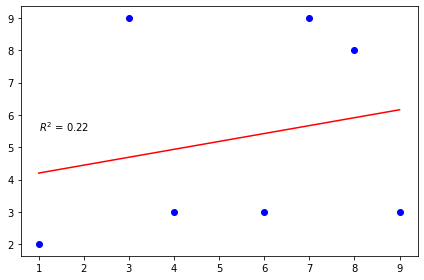

In [11]:
# Plot the Result

Analyzer.plot()

In [12]:
# Now let's try linear regression with all the data plotted against our chosen x value.

Analyzer.multi_linear_regression();

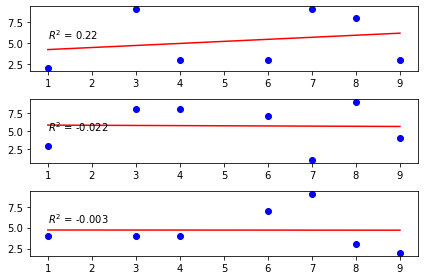

In [13]:
# And plot the results again

Analyzer.plot()

In [14]:
# Generate a report of our linear regression

Analyzer.report();

In [15]:
print(Analyzer)

R-squared Values:
$R^2$ = 0.21973289415589237
$R^2$ = -0.021771307016784782
$R^2$ = -0.003403960702072377
Regression X Ys:
[1. 3. 4. 6. 7. 8. 9.] [array([4.20402299, 4.69252874, 4.93678161, 5.42528736, 5.66954023,
       5.9137931 , 6.15804598]), array([5.81609195, 5.77011494, 5.74712644, 5.70114943, 5.67816092,
       5.65517241, 5.63218391]), array([4.72701149, 4.72126437, 4.7183908 , 4.71264368, 4.70977011,
       4.70689655, 4.70402299])]
[1. 3. 4. 6. 7. 8. 9.] [array([4.20402299, 4.69252874, 4.93678161, 5.42528736, 5.66954023,
       5.9137931 , 6.15804598]), array([5.81609195, 5.77011494, 5.74712644, 5.70114943, 5.67816092,
       5.65517241, 5.63218391]), array([4.72701149, 4.72126437, 4.7183908 , 4.71264368, 4.70977011,
       4.70689655, 4.70402299])]
[1. 3. 4. 6. 7. 8. 9.] [array([4.20402299, 4.69252874, 4.93678161, 5.42528736, 5.66954023,
       5.9137931 , 6.15804598]), array([5.81609195, 5.77011494, 5.74712644, 5.70114943, 5.67816092,
       5.65517241, 5.63218391]), array

In [17]:
# We can save the data

Analyzer.save() # generates 'saved.txt'

Now that we have completed writing the backend of our analysis program, let's implement the Tkinter GUI.

In [18]:
# To generate a Tkinter window 

import tkinter as tk

root = tk.Tk()
root.mainloop()

We can create our own class for our program GUI by inheriting from tk.Tk.

In [19]:
class GUI(tk.Tk):
    def __init__(self):
        super().__init__()
        self.geometry = ('300x200')
        self.title('Regression Analysis')

root = GUI()
root.mainloop()

Now we need to add features to this window to access the methods we defined under our 'Application' class.

For simplicity, let's create buttons for most of the functions we want to permit a user to access.

We will have to change the methods of our 'Application' class so that the methods requiring *input()* instead use tkinter related textual inputs.

In [20]:
class GUI(tk.Tk):
    def __init__(self):
        super().__init__()
        self.geometry = ('300x200')
        self.title('Regression Analysis')
        tk.Button(self, text='Load', bg='white', fg='black').pack(expand=True)
        tk.Button(self, text='Save', bg='white', fg='black').pack(expand=True)
        tk.Button(self, text='Linear Regression', bg='white', fg='black').pack(expand=True)
        tk.Button(self, text='Multiple Linear Regression', bg='white', fg='black').pack(expand=True)
        tk.Button(self, text='Plot Result', bg='white', fg='black').pack(expand=True)
        
root = GUI()
root.mainloop()

Now that we have the layout of our small program we will add the functionality to each of our buttons as well.

--Available Data--

[[1. 2. 3. 4.]
 [3. 9. 8. 4.]
 [4. 3. 8. 4.]
 [6. 3. 7. 7.]
 [7. 9. 1. 9.]
 [8. 8. 9. 3.]
 [9. 3. 4. 2.]]




Select the x column:  0
Select the y column:  1


--Available Data--

[[1. 2. 3. 4.]
 [3. 9. 8. 4.]
 [4. 3. 8. 4.]
 [6. 3. 7. 7.]
 [7. 9. 1. 9.]
 [8. 8. 9. 3.]
 [9. 3. 4. 2.]]




Select the x column:  0
Select the y column:  1


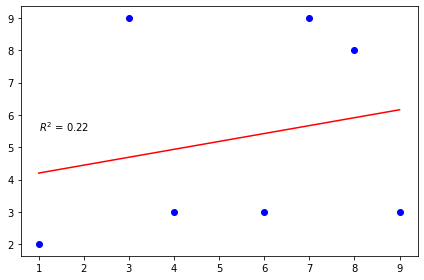

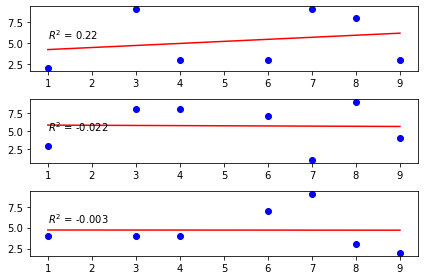

In [ ]:
class GUI(tk.Tk, Application): # <-- Note multiple inheritance now (Application methods accessed via 'self')
    def __init__(self):
        super().__init__()
        self.geometry = ('300x200')
        self.title('Regression Analysis')

        
        # -- Main Screen Functions -- #
        
        tk.Button(self, text='Load', bg='white', fg='black', command=lambda: self.load('test.txt')).pack(expand=True)
        tk.Button(self, text='Select', bg='white', fg='black', command=lambda: self.select()).pack(expand=True)
        tk.Button(self, text='Save', bg='white', fg='black', command=lambda: self.save()).pack(expand=True)
        tk.Button(self, text='Linear Regression', bg='white', fg='black', command=lambda: self.linear_regression()).pack(expand=True)
        tk.Button(self, text='Multiple Linear Regression', bg='white', fg='black', command=lambda: self.multi_linear_regression()).pack(expand=True)
        tk.Button(self, text='Plot Result', bg='white', fg='black', command=lambda: self.plot()).pack(expand=True)
        
root = GUI()
root.mainloop()

There is much more we can do with Tkinter (drop down menus, text entry, in-GUI plot display, etc.).

For now we have reviewed the basic structure of generating a small application using our knowledge from previous sessions.